In [89]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
 titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Q1.--> Who were the passengers on the titanic

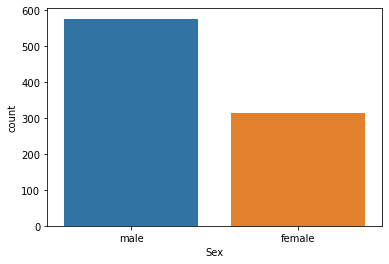

In [15]:
# we will check the gender ratio on the ship

sns.countplot('Sex',data=titanic_df)

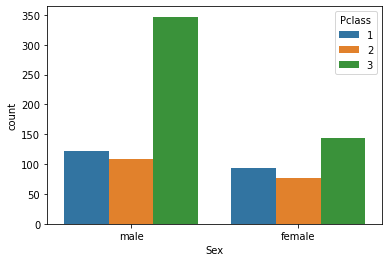

In [26]:
sns.countplot('Sex',data=titanic_df,hue='Pclass')

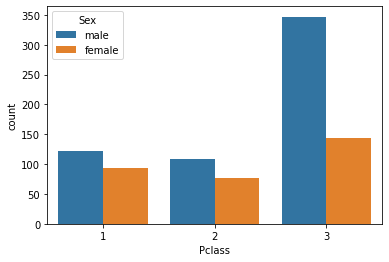

In [27]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [30]:
def male_female_child(passenger): ## passenger object taken and we will take age and sex of passenger
    age,sex = passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [31]:
# Creating a new column in df which will indicate male female or child
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [32]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


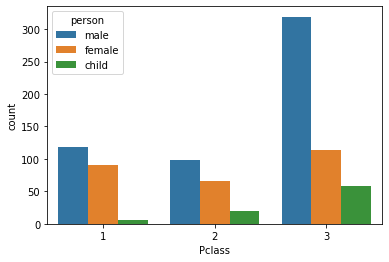

In [33]:
#
sns.countplot('Pclass',data=titanic_df,hue='person')

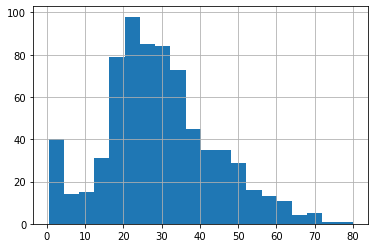

In [36]:
# checking distribution of ages
titanic_df['Age'].hist(bins=20)

In [37]:
titanic_df['Age'].mean()

29.69911764705882

In [38]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

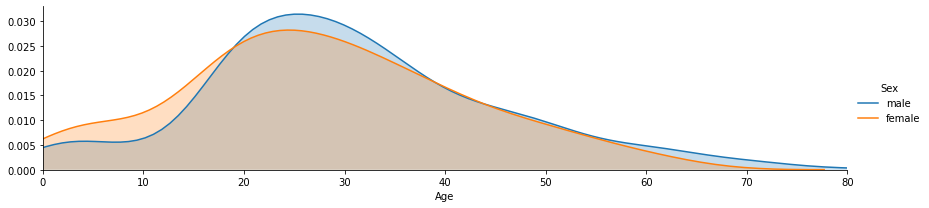

In [39]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) ##Mapped kde plot from age column

oldest = titanic_df['Age'].max() # set oldest person using max function
fig.set(xlim=(0,oldest))

fig.add_legend()

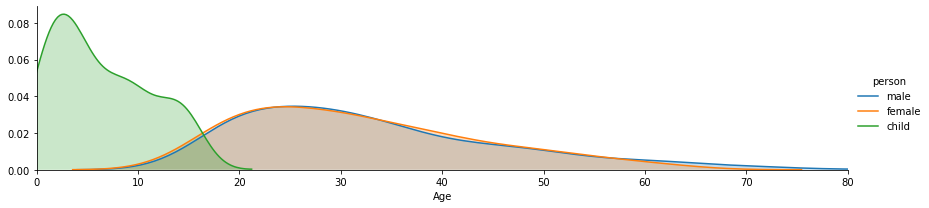

In [40]:
# including children column
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) ##Mapped kde plot from age column

oldest = titanic_df['Age'].max() # set oldest person using max function
fig.set(xlim=(0,oldest))

fig.add_legend()

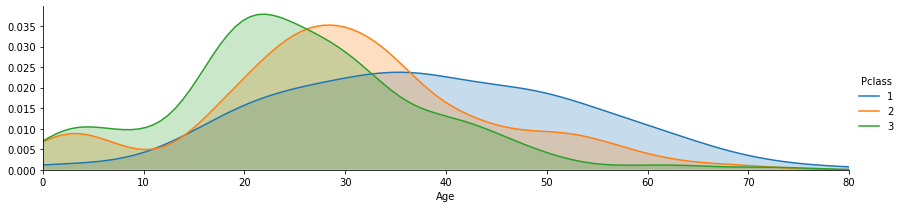

In [41]:
# Checking for p class
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True) ##Mapped kde plot from age column

oldest = titanic_df['Age'].max() # set oldest person using max function
fig.set(xlim=(0,oldest))

fig.add_legend()

Q2 ---> What deck were the passengers on and how does that relate to their class?

In [42]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [43]:
# will check for null values too

titanic_df['Cabin'].isna().count()

891

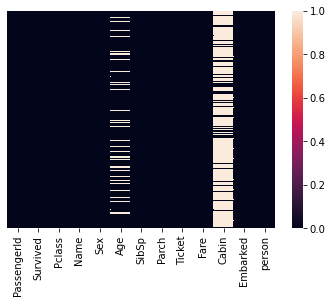

In [47]:
#visulalizing null values and deleting them
sns.heatmap(data=titanic_df.isnull(),yticklabels=False)

In [48]:
deck = titanic_df['Cabin'].dropna()

In [49]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [51]:
deck.value_counts().sum()

204

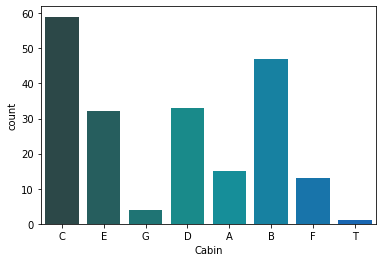

In [57]:
## we need only first letter of cabin so we can decide its level like A,B,C,D,E,F....
# Creating empty list
levels = []

for word in deck:
    levels.append(word[0]) ## appending only first letter of deck
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data= cabin_df,palette='winter_d')

# use sns.countplot instead of factorplot
# can choose diff colorpalletes from
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html

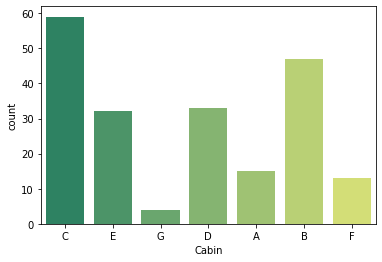

In [58]:
cabin_df = cabin_df[cabin_df.Cabin !='T'] # redefining cabindf where it does not have T category 
sns.countplot('Cabin',data= cabin_df,palette='summer')

In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


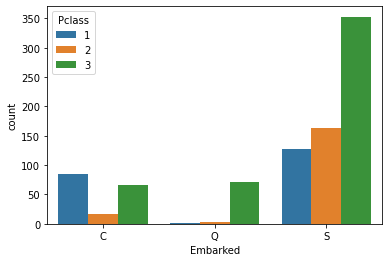

In [63]:
## checking for embarked column to see from where people are came from 
# C = Cherbourg, Q = Queenstown, S = Southampton

sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

Q3 --> who was alone and who was with family

In [64]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [65]:
# if passenger has no one in sibSp and Parch column we can say that the passenger was alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [66]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [67]:
titanic_df['Alone'].value_counts().sum()

891

In [69]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'



C:\Users\Arvind\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


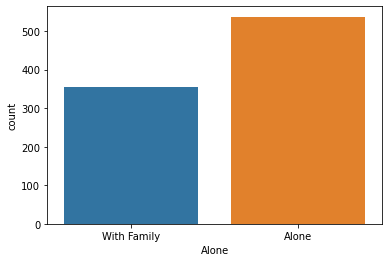

In [72]:
sns.countplot('Alone',data=titanic_df)

What Factors help someone surviving from sinking of titanic

In [73]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

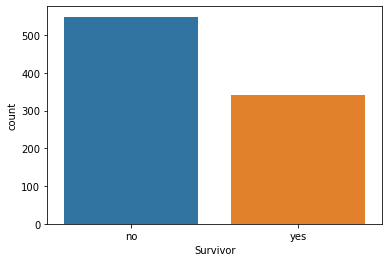

In [74]:
sns.countplot('Survivor',data=titanic_df)

C:\Users\Arvind\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


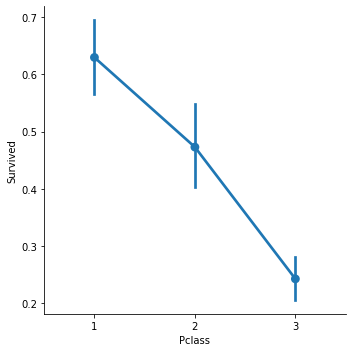

In [76]:
## checking if class was a factor of survival ???

sns.factorplot('Pclass','Survived',data=titanic_df)

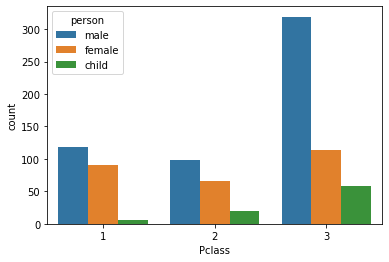

In [80]:
# Survival rate for 3 class persons are low and we can see more men are from class3
sns.countplot('Pclass',data=titanic_df,hue='person')

C:\Users\Arvind\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


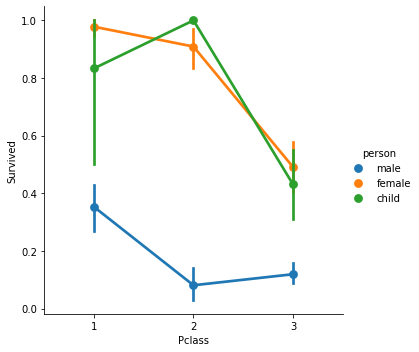

In [81]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

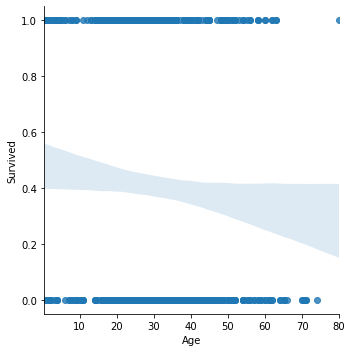

In [90]:
# checking for factor that does age matter in survival?? checking for that ..using linearplot

sns.lmplot('Age','Survived',data=titanic_df)

 we can see the older the passenger was lesser they survied in accident

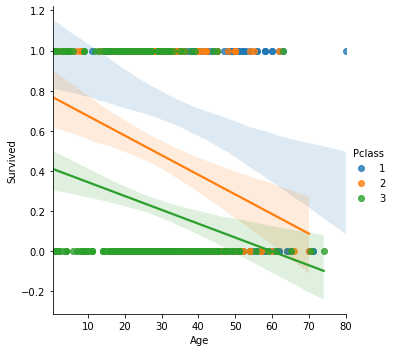

In [91]:
sns.lmplot('Age','Survived',data=titanic_df,hue='Pclass')

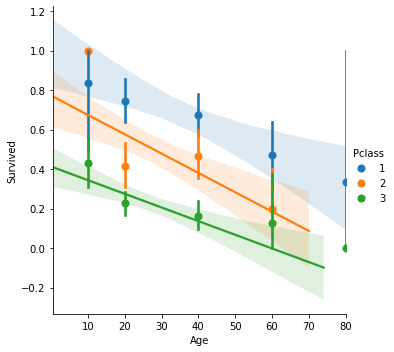

In [92]:
generation = [10,20,40,60,80] # cleaning data so we can get ages in this range in our plot

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generation)

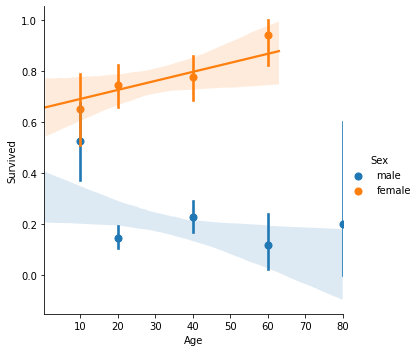

In [93]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generation)

In [94]:
## 1.Did deck have effect on passenger survival rate? 
##2. did having a family increase odds of surviving the crash?

In [95]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
